In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
dataset=pd.read_csv('new_dataset.csv')

In [3]:
dataset

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [4]:
dataset.Class.unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [5]:
dataset["Class"] = dataset.Class.replace({'PRAD':1,'LUAD':2,'BRCA':3,'COAD':4, 'KIRC':5})

In [6]:
dataset

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,1,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,2,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,1,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,1,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,3,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,3,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,2,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,4,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,1,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


Class içerisindeki verileri object'ten float64'e çevirdik.

### Bu çalışmadaki amacımız veri setine Unsupervised Machine Learning algoritmalarını uygulayarak tahmin başarısını ölçmek.


### Öncelikle k-Means algoritmasını uygulayalım.

In [7]:
y = dataset['Class']
X = dataset.drop(columns=['Class'], axis=1)

In [8]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [9]:
tam_tahmin = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)

In [10]:
pd.crosstab(y, tam_tahmin) 

col_0,0,1,2,3,4
Class,,,,,
1,0,134,0,1,1
2,0,0,0,2,139
3,0,0,0,247,53
4,0,0,74,0,4
5,144,0,0,0,2


In [11]:
metrics.adjusted_rand_score(y, tam_tahmin)

0.7940732386133297

#### 0'ın rastgele etiketlenmeyi ve 1'in temel gerçeğin mükemmel bir şekilde kopyalandığını gösterir. Buradaki sonuca baktığımızda, değerlerin mükemmel bir şekilde kopyalanmış olduğunu gösteriyor.

In [12]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)
rand_index_score(y, tam_tahmin)

0.9112234706616729

#### Rand indeks değeri de güzel çıktı.

In [13]:
etiketler = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.09944035882520391


#### Değerler çok kötü kümelenmeler için -1 ile çok yoğun kümelenmeler için +1 arasında olur.Bizim Siluet değerimiz ortalama olan 0 a daha yakın çıktı.

#### Hierarchcal Clustering yapalım.

#### Farklı linkage yöntemlerini deneyelim.

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

linkages = ('complete','ward','average')
for link in linkages:
    agg_küme = AgglomerativeClustering(linkage=link, 
                                      n_clusters=2)

    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print('for "{}"'.format(link))
    print("ARI: {} "
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))
    print("-------------------------------------")

for "complete"
ARI: -0.004295824015137443 
The silhoutte score: 0.16338816687151358
-------------------------------------
for "ward"
ARI: 0.23590734794341528 
The silhoutte score: 0.09648925334367017
-------------------------------------
for "average"
ARI: 0.00039982153365407744 
The silhoutte score: 0.3495316483969249
-------------------------------------


#### Bu yaptığımız denemede de en iyi ARI skorunu ward'da elde ettik. En düşük silhoutte skorun ward'da çıkmasının sebebi, ward'ın iki sınıfı birbirinden iyi şekilde farklılaştırmasıdır.

##### Bir dendogram çizdirelim.

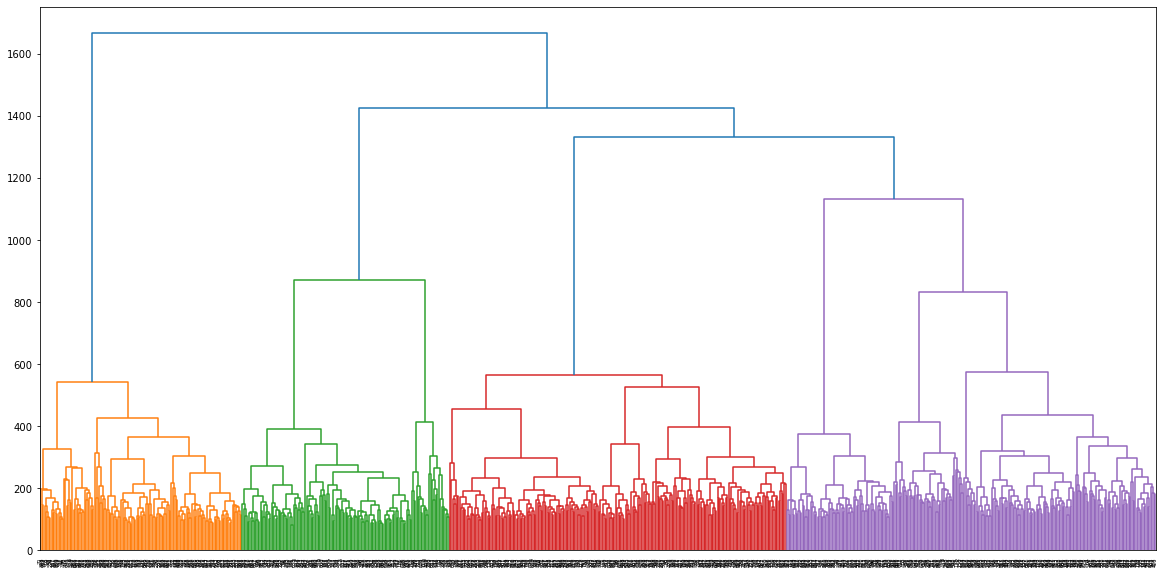

In [15]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

#### Bu şekilde bir dendogram elde ettik.